In [ ]:
!pip install svgling

     |████████████████████████████████| 66 kB 3.0 MB/s 


In [ ]:
!pip install yake
!pip install pytextrank
!python3 -m spacy download en_core_web_sm
!pip install sentence-transformers

     |████████████████████████████████| 60 kB 4.2 MB/s 
     |████████████████████████████████| 137 kB 41.2 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.8.9-cp37-cp37m-linux_x86_64.whl size=73228 sha256=23e76f2e483963577127ad2d265203a4e22433de281f41a6dd471dd1656e4bda
  Stored in directory: /root/.cache/pip/wheels/32/a9/ef/5d8742e72deaf0d1de327a180d008c2c0299367581800ea73f
  Created wheel for segtok: filename=segtok-1.5.10-py3-none-any.whl size=25030 sha256=10591715957e7a6d450992b5e561556657aebe6c2a2057792b0a71cde92af1eb
  Stored in directory: /root/.cache/pip/wheels/67/b7/d0/a121106e61339eee5ed083bc230b1c8dc422c49a5a28c2addd
Successfully built jellyfish segtok
     |████████████████████████████████| 6.0 MB 12.3 MB/s 
     |████████████████████████████████| 1.0 MB 50.4 MB/s 
     |████████████████████████████████| 38.2 MB 24 kB/s 
     |████████████████████████████████| 11.2 MB 65.2 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████

     |████████████████████████████████| 13.9 MB 101 kB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     |████████████████████████████████| 78 kB 4.1 MB/s 
     |████████████████████████████████| 3.1 MB 17.6 MB/s 
     |████████████████████████████████| 3.3 MB 48.5 MB/s 
     |████████████████████████████████| 1.2 MB 43.1 MB/s 
     |████████████████████████████████| 59 kB 6.1 MB/s 
     |████████████████████████████████| 596 kB 63.0 MB/s 
     |████████████████████████████████| 895 kB 33.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=8cb4bdce212a18a4e37735f4b9dc0ab71b5e8a5ed46b4f2279d913be973677e1
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea5

In [ ]:
import pandas as pd
import numpy as np
import math
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from collections import Counter
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import yake
import spacy
import pytextrank
from nltk.corpus import stopwords
import svgling

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# DT DT PRP$ TO IN PRP$ CC PRP MD TO IN DT CC RP PRP RB . DT  UH WP WP$ WRB 

In [ ]:
s = """
the one thing all your employees need to succeed at their jobs is knowledge , but it can be tough to find information within a company and figure out the best way to share it . here what in this is jack . he has a new sales rep . he has been through a quick training but still spends over an hour a day looking for the information he needs to sell . this is jane . jane is an h r manager . she has frustrated because she keeps answering the same questions from employees about benefits . this is evan . he has a customer service rep trying to answer a call about security in his company software . the customer on hold while he asks his colleagues for the answer . according to mckinsey , employees spend enty percent of their time at works earching for the information they need to do their jobs . twenty percent that has one full day of the week . at bloomfire we are committed to getting that twenty percent as close to zero as possible . we do that by making company knowledge organized , tagged , easily a cessible , and shareable . bloomfire is social knowledge software that takes all the information that lives in your employees minds and computers and makes it easy to find and share , so that anyone can access exactly the information they need to do their jobs . with bloomfire it has easy to store documents like powerpoint , spreadsheets , and videos just drag-and-drop . bloomfire tags the content making it easy for anyone to find . bloomfire also has a robust q & a engine . upload your questions and answers to bloomfire so that everyone can find the answers to their questions without asking you over and over again bloomfire is so easy to use and implement that clients end up using it in lots of different ways , but they all have one thing in common : they get results . advertising giant ogtivy increased user satisfaction by 75 % when they upgraded from their old partner portal to bloomfire . etsy uses bloomfire for customer support and saves more than 10 , 000 hours a year . dun and bradstreet uses bloomfire as their social Intranet to help employees find information and reduce redundant questions . we helped these companies . visit us today and see how we can help your jacks , janes , and evans and your entire c mpany - become as much as twenty percent more efficient !
"""

In [ ]:
pos_tag(word_tokenize(s))

In [ ]:
reviews = pd.read_csv('reviews.csv', parse_dates=['date'])

reviews.head()

,name,title,review,rating,rating_out_of,date
0,Md Alam,West not working,Bekar,1.0,5.0,2021-11-17
1,Hema,Was not good don't buy this,It was not good.. For earphones connection it...,1.0,5.0,2021-11-09
2,Mahesh kumar,Just ok,Jaldi kharab ho gaya,3.0,5.0,2021-11-07
3,amey ghatge,Product not working,Within one month this product has stopped work...,1.0,5.0,2021-10-09
4,Lobzang Dorjay,Superb product,Sound quality is just great if we use earphone...,3.0,5.0,2021-09-04


In [ ]:
(reviews['rating']
  .map(round)
  .value_counts()
  .sort_index()
  .plot(kind='bar', title='Rating Distribution')
);

In [ ]:
(reviews
  .groupby(by=reviews['date'].dt.to_period('M'))
  .agg({'rating': 'mean'})
  .plot(kind='bar', title='Average Rating Over Time')
);

In [ ]:
def undo_contractions(phrase):
    # specific
    phrase = re.sub(r"won[\'’]t", "will not", phrase)
    phrase = re.sub(r"can[\'’]t", "can not", phrase)

    # general
    phrase = re.sub(r"n[\'’]t", " not", phrase)
    phrase = re.sub(r"[\'’]re", " are", phrase)
    phrase = re.sub(r"[\'’]s", " is", phrase)
    phrase = re.sub(r"[\'’]d", " would", phrase)
    phrase = re.sub(r"[\'’]ll", " will", phrase)
    phrase = re.sub(r"[\'’]t", " not", phrase)
    phrase = re.sub(r"[\'’]ve", " have", phrase)
    phrase = re.sub(r"[\'’]m", " am", phrase)
    return phrase

undo_contractions("very bad product . it’s a very bad product. it’s defective and won’t get replaced . the voice breaks and honestly it’s better to get another usb audio card.")

'very bad product . it is a very bad product. it is defective and will not get replaced . the voice breaks and honestly it is better to get another usb audio card.'

In [ ]:
en_stopwords = set(stopwords.words('english'))

emoji_regex = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002500-\U00002BEF"  # chinese char
    u"\U00002702-\U000027B0"
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    u"\U0001f926-\U0001f937"
    u"\U00010000-\U0010ffff"
    u"\u2640-\u2642" 
    u"\u2600-\u2B55"
    u"\u200d"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\ufe0f"  # dingbats
    u"\u3030"
                  "]+", re.UNICODE)


def lemmatize(sentence):
  return WordNetLemmatizer().lemmatize(sentence)

# was vdb
# dont remove not

def pos_filter(tokens):
  unwanted_pos = set([
                      'CC', 
                      'DT',
                      'EX', 
                      'IN', 
                      'MD', 
                      'PRP', 'PRP$', 
                      # 'RB', 
                      'RBR', 'RBS',
                      'RP', 
                      'TO', 
                      'UH', 
                      'WP', 'WP$',
                      'WRB'
  ])
  tokens = pos_tag(tokens)
  # print(tokens)
  # print()
  tokens = [
      token for token, pos in tokens 
      if (pos not in unwanted_pos)
  ]
  # print(tokens)
  # print()
  return tokens

def filter_min_length(words):
  return [word for word in words if len(word) > 2]

reviews['text'] = reviews['title'] + ' . ' + reviews['review']

reviews['tokenized'] = (reviews['text']
  .fillna('')
  .str.replace(r'([a-z]+)([A-Z])', r'\1 \2') # badProduct bad Product
  .str.lower()
  .str.replace(emoji_regex, '')
  .str.replace('\n', '.')
  .str.replace(r'\s*\.+\s*', '. ')
  .apply(undo_contractions)
  # .str.replace('products?', 'it')
  # .apply(lemmatize)
  .apply(word_tokenize)
  # .apply(pos_filter)
  # .apply(lambda tokens : [token for token in tokens if token not in en_stopwords])
  # .apply(filter_min_length)
)

reviews['text_cleaned'] = reviews['tokenized'].str.join(" ")

In [ ]:
reviews['tokenized']

0                         [west, not, working, ., bekar]
1      [was, not, good, do, not, buy, this, ., it, wa...
2                   [just, ok., jaldi, kharab, ho, gaya]
3      [product, not, working, ., within, one, month,...
4      [superb, product, ., sound, quality, is, just,...
                             ...                        
255    [go, for, it, ., amazing, ., i, definitely, di...
256    [amazing, product, !, ., i, purchased, this, p...
257    [very, good, for, the, amount, paid, ., ., it,...
258                [good, product, ., value, for, money]
259    [good, bargain, ., nothing, much, to, complain...
Name: tokenized, Length: 260, dtype: object

In [ ]:
amz_kws = [
 'build quality',
 'sound quality',
 'value for money',
 'sound card',
 'usb hub',
 'waste of money',
 'works well',
 'quality good',
 'do not buy',
 'hard drive',
 'audio jack',
 'working fine',
 'usb port',
 'keeps disconnecting'
]

for kw in amz_kws:
  print(pos_tag(word_tokenize(kw)))

[('build', 'NN'), ('quality', 'NN')]
[('sound', 'JJ'), ('quality', 'NN')]
[('value', 'NN'), ('for', 'IN'), ('money', 'NN')]
[('sound', 'JJ'), ('card', 'NN')]
[('usb', 'JJ'), ('hub', 'NN')]
[('waste', 'NN'), ('of', 'IN'), ('money', 'NN')]
[('works', 'NNS'), ('well', 'RB')]
[('quality', 'NN'), ('good', 'JJ')]
[('do', 'VBP'), ('not', 'RB'), ('buy', 'VB')]
[('hard', 'JJ'), ('drive', 'NN')]
[('audio', 'JJ'), ('jack', 'NN')]
[('working', 'VBG'), ('fine', 'NN')]
[('usb', 'JJ'), ('port', 'NN')]
[('keeps', 'NNS'), ('disconnecting', 'VBG')]


In [ ]:


# tokens = word_tokenize(". ".join(amz_kws))
# tokens = pos_tag(tokens)
# print(tokens)
# # print(tokens)
# chunkGrams = [
#     r"""Chunk: {<JJ>+<NN>+}""", # adj nown
#     r"""Chunk: {<NN|NNP|NNS|NNPS>+<IN|DT|NN|VB.|RB>*<JJ>+}""", # Noun and Adjective with other POS in between
#     r"""Chunk: {<NN|NNP|NNS|NNPS>{2,9}}""", # bunch or nowns,
#     r"""Chunk: {<NN><IN><NN>}""", # nn prp nn
#     r"""Chunk: {<VB.?>+<RB><VB.?>*}""", 
#     r"""Chunk: {<VB.?>+<JJ.?>+}""", 
#     r"""Chunk: {<NN.?>+<VB.?>+}""", 
# ]
# chunkParsers = [nltk.RegexpParser(chunkGram) for chunkGram in chunkGrams]

# parsed = []
# chunks = [parser.parse(tokens) for parser in chunkParsers]
# for chunk in chunks:
#   subtrees = chunk.subtrees(lambda t : t.label() == 'Chunk')
#   parsed.extend(subtrees)
#   # print(chunk)

# for tree in parsed:
#   print(tree)


In [ ]:
" ".join([leaf[0] for leaf in parsed[0].leaves()])

'build quality'

In [ ]:
kws = []
for i in range(len(reviews)):
  txt = reviews['text_cleaned'][i]
  if len(txt.split(" ")) > 25:
    kw_extractor = yake.KeywordExtractor(
        top=5,
        n=4,
        dedupLim=0.9,
        windowsSize=2,
    )

    # custom_kw_extractor = yake.KeywordExtractor(
    #     lan=language, 
    #     n=max_ngram_size, 
    #     dedupLim=deduplication_thresold, 
    #     dedupFunc=deduplication_algo, 
    #     windowsSize=windowSize, 
    #     top=numOfKeywords, 
    #     features=None
    # )
    kw = kw_extractor.extract_keywords(txt)
    # break
    kws.extend([k[0] for k in kw if k[1] <= 0.018])

In [ ]:
kws

['product has stopped working',
 'stopped working',
 'usb hub audio sound',
 'cro usb hub audio',
 'hub audio sound',
 'nice long cable',
 'cro usb hub',
 'frequently from the laptop',
 'ports on the device',
 'laptop usb port',
 'disconnected randomly and frequently',
 'port on device works',
 'audio port not working',
 'sound port not working',
 'mice port not working',
 'port not working',
 'audio port',
 'drivers for manjaro linux',
 'find the compatible drivers',
 'compatible drivers for manjaro',
 'bang for bucks',
 'bad cable good product',
 'exchange the provided sable',
 'provided sable with printer',
 'bad cable good',
 'cable good product',
 'support stereo mic',
 'waste of money',
 'makes noise',
 'recording purpose',
 'valuable product',
 'dont buy this product',
 'bad ports for headphones',
 'headphones and microphone dont',
 'microphone dont buy',
 'device troubleshooting option',
 'troubleshooting option in windows',
 'working properly connecting',
 'received duplicate 

In [ ]:
nps = []
for i in range(len(reviews)):
  tokens = reviews['tokenized'][i]
  # tokens = word_tokenize(text)
  tokens = pos_tag(tokens)
  chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}""" # nown phrase
  chunkParser = nltk.RegexpParser(chunkGram)
  chunked = chunkParser.parse(tokens)
  np = list(chunked.subtrees(filter=lambda t : t.label() == 'Chunk'))
  if len(np) > 0:
    print(tokens)

  nps.extend(np)

[('poor', 'JJ'), ('quality', 'NN'), ('.', '.'), ('i', 'VB'), ('bought', 'VBD'), ('this', 'DT'), ('product', 'NN'), ('in', 'IN'), ('early', 'JJ'), ('june', 'NN'), ('this', 'DT'), ('year', 'NN'), ('.', '.'), ('it', 'PRP'), ('is', 'VBZ'), ('just', 'RB'), ('about', 'RB'), ('6', 'CD'), ('months', 'NNS'), ('and', 'CC'), ('now', 'RB'), ('it', 'PRP'), ('is', 'VBZ'), ('not', 'RB'), ('working', 'VBG'), ('.', '.'), ('gone', 'VBN'), ('.', '.'), ('i', 'NN'), ('would', 'MD'), ('not', 'RB'), ('recommend', 'VB'), ('this', 'DT'), ('product', 'NN'), ('/', 'NNP'), ('brand', 'NN'), ('.', '.')]


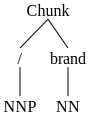

In [ ]:
svgling.draw_tree(nps[0])

In [ ]:
reviews['text_cleaned'][:200].values

array(['west not working . bekar',
       'was not good do not buy this . it was not good . for earphones connection it was not working correctly',
       'just ok . jaldi kharab ho gaya',
       'product not working . within one month this product has stopped working . does anyone from company read this ? let me know how to replace or return this product ?',
       'superb product . sound quality is just great if we use earphones a d headphones .',
       'se cro usb hub audio sound . very nice long cable with usb ports not to waste money for usb ports very nice loved it i recommend to buy this',
       'worst of the worst just like indian people itse . super dislike it . will never take if for free aslo',
       'nice product and usefull . it is amazing .',
       'disconnects frequently . this is not much better than the dac on my laptop.the major issue is it keeps getting disconnected randomly and frequently from the laptop usb port.i have nothing plugged into the usb ports on the 

In [ ]:
# https://stackoverflow.com/questions/35857519/efficiently-count-word-frequencies-in-python
def get_frequency_dist(tokens, ngram_range=(2, 3), max_df=1, min_df=1):
  count_vec = CountVectorizer(
      tokenizer=lambda x : x,
      preprocessor=lambda x : x,
      max_df=max_df,
      min_df=min_df,
      ngram_range=ngram_range
  )
  transformed = count_vec.fit_transform(tokens)
  vocab = list(count_vec.get_feature_names_out())
  counts = transformed.sum(axis = 0).A1
  freq_distribution = Counter(dict(zip(vocab, counts)))
  return freq_distribution

In [ ]:
def get_wordcloud(tokens):
  dist = get_frequency_dist(tokens, max_df=0.8)
  return WordCloud().generate_from_frequencies(dist)

def plot_wordcloud(wc):
  plt.figure(figsize=(20, 10))
  plt.imshow(wc)
  plt.axis("off");

In [ ]:
all_wordcloud = get_wordcloud(
    reviews['tokenized']
)

negative_wordcloud = get_wordcloud(
    reviews.query('rating <= 1')['tokenized']
)

neutral_wordcloud = get_wordcloud(
    reviews.query('rating > 1 & rating <= 4')['tokenized']
)

positive_wordcloud = get_wordcloud(
    reviews.query('rating > 4')['tokenized']
)

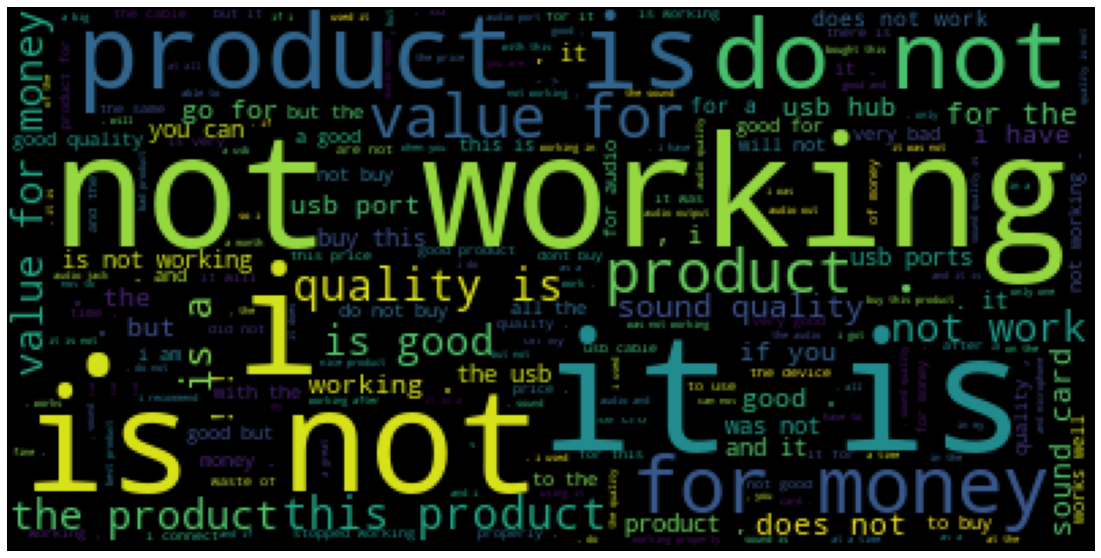

In [ ]:
plot_wordcloud(all_wordcloud)

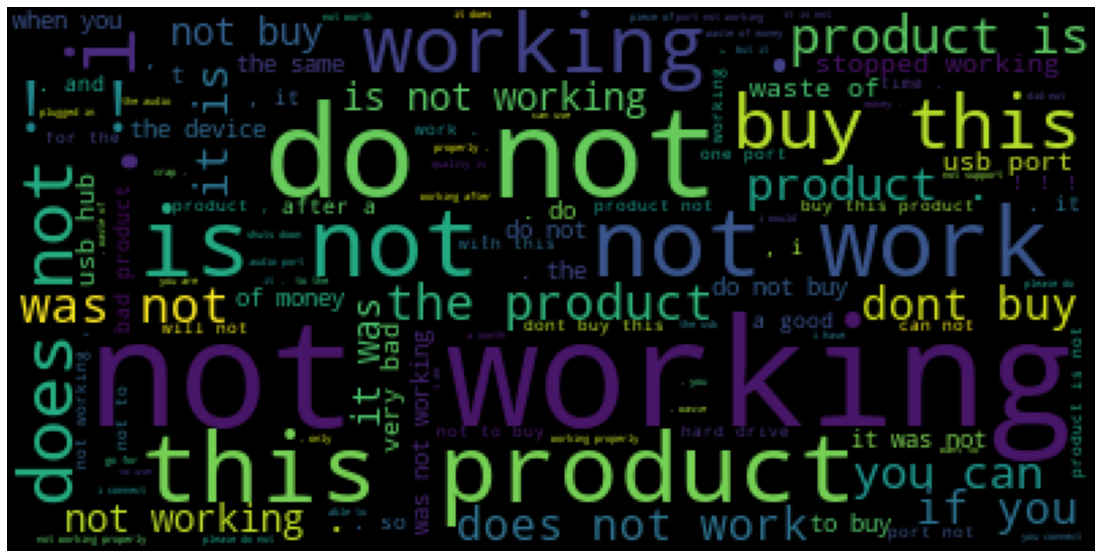

In [ ]:
plot_wordcloud(negative_wordcloud)

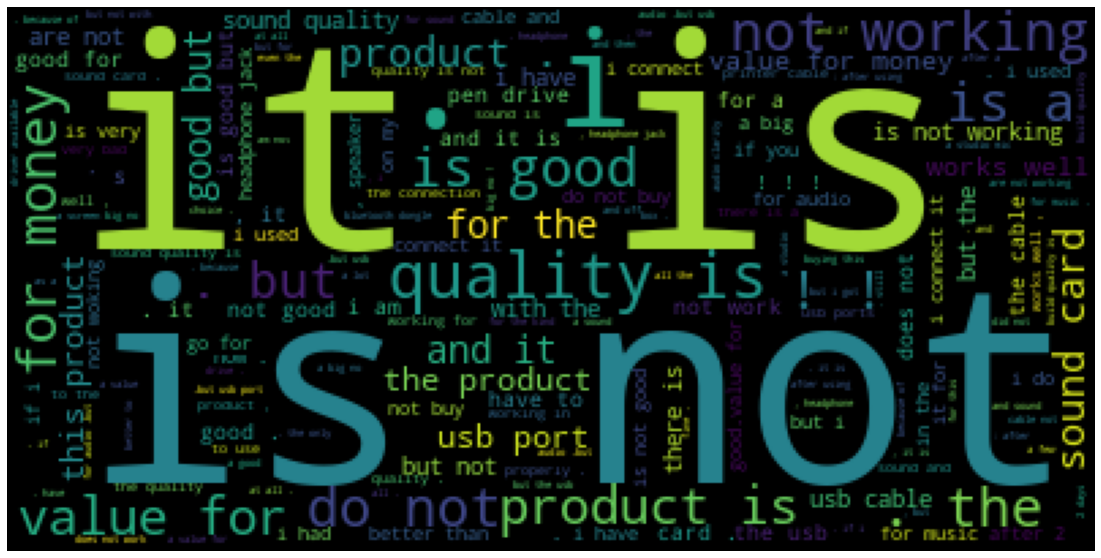

In [ ]:
plot_wordcloud(neutral_wordcloud)

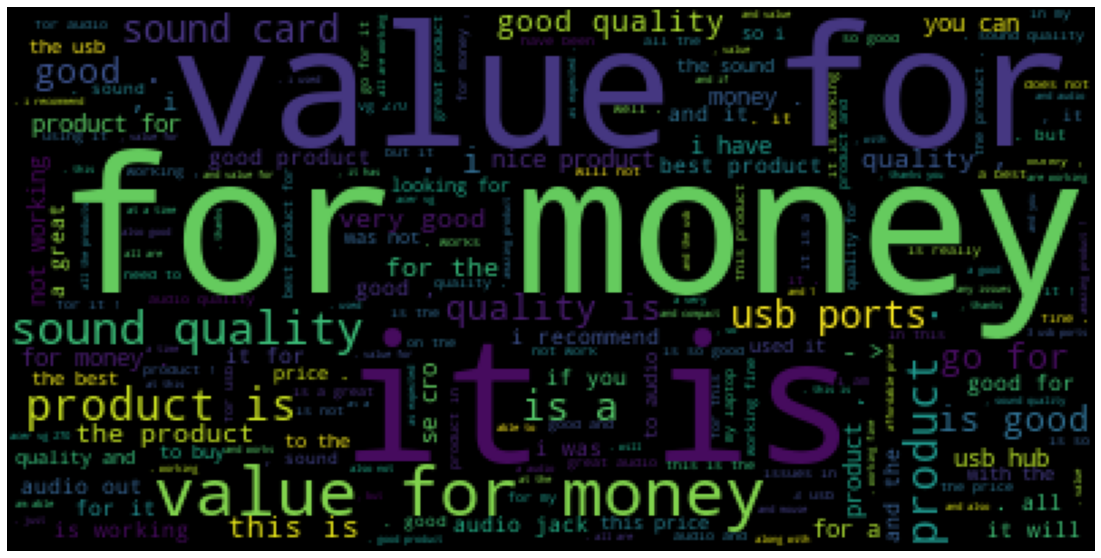

In [ ]:
plot_wordcloud(positive_wordcloud)

In [ ]:
from gensim.summarization import keywords
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import itertools

In [ ]:
def generate_candidates_gensim(doc):
  extracted = keywords(doc,
      split=True,
      scores=True,
      # lemmatize=True,
  )
  return [e[0] for e in extracted], extracted

def generate_candidates_yake(doc):
  kw_extractor = yake.KeywordExtractor(top=100)
  kw = kw_extractor.extract_keywords(doc)
  return [k[0] for k in kw], kw

def generate_candidates_count_vectorizer(doc, ngram_range=(1, 3)):
  vectorizer = CountVectorizer(ngram_range=ngram_range)
  vectorizer.fit([doc])
  return vectorizer.get_feature_names_out()

chunkGrams = [
    r"""Chunk: {<JJ>+<NN>+}""", # adj nown
    r"""Chunk: {<NN|NNP|NNS|NNPS>+<IN|DT|NN|VB.|RB>*<JJ>+}""", # Noun and Adjective with other POS in between
    r"""Chunk: {<NN|NNP|NNS|NNPS>{2,9}}""", # bunch or nowns,
    r"""Chunk: {<NN><IN><NN>}""", # nn prp nn
    r"""Chunk: {<VB.?>+<RB><VB.?>*}""", 
    r"""Chunk: {<VB.?>+<JJ.?>+}""", 
    r"""Chunk: {<NN.?>+<VB.?>+}""", 
]

chunkParsers = [nltk.RegexpParser(chunkGram) for chunkGram in chunkGrams]

def generate_candidates_chunk(corpus, parsers=chunkParsers):
  candidates = []
  for doc in corpus:
    tokens = pos_tag(doc)
    chunks = [parser.parse(tokens) for parser in parsers]
    for chunk in chunks:
      subtrees = chunk.subtrees(lambda t : t.label() == 'Chunk')
      candidate_keywords = [" ".join([leaf[0] for leaf in subtree.leaves()]) for subtree in subtrees]
      candidates.extend(candidate_keywords)
  return candidates

In [ ]:
def max_sum_sim(doc_embedding, candidate_embeddings, words, top_n, nr_candidates):
    # Calculate distances and extract keywords
    distances = cosine_similarity(doc_embedding, candidate_embeddings)
    distances_candidates = cosine_similarity(candidate_embeddings, 
                                            candidate_embeddings)

    # Get top_n words as candidates based on cosine similarity
    words_idx = list(distances.argsort()[0][-nr_candidates:])
    words_vals = [candidates[index] for index in words_idx]
    distances_candidates = distances_candidates[np.ix_(words_idx, words_idx)]

    # Calculate the combination of words that are the least similar to each other
    min_sim = np.inf
    candidate = None
    for combination in itertools.combinations(range(len(words_idx)), top_n):
        sim = sum([distances_candidates[i][j] for i in combination for j in combination if i != j])
        if sim < min_sim:
            candidate = combination
            min_sim = sim

    return [words_vals[idx] for idx in candidate]



def mmr(doc_embedding, word_embeddings, words, top_n, diversity):

    # Extract similarity within words, and between words and the document
    word_doc_similarity = cosine_similarity(word_embeddings, doc_embedding)
    word_similarity = cosine_similarity(word_embeddings)

    # Initialize candidates and already choose best keyword/keyphras
    keywords_idx = [np.argmax(word_doc_similarity)]
    candidates_idx = [i for i in range(len(words)) if i != keywords_idx[0]]

    for _ in range(top_n - 1):
        # Extract similarities within candidates and
        # between candidates and selected keywords/phrases
        candidate_similarities = word_doc_similarity[candidates_idx, :]
        target_similarities = np.max(word_similarity[candidates_idx][:, keywords_idx], axis=1)

        # Calculate MMR
        mmr = (1-diversity) * candidate_similarities - diversity * target_similarities.reshape(-1, 1)
        mmr_idx = candidates_idx[np.argmax(mmr)]

        # Update keywords & candidates
        keywords_idx.append(mmr_idx)
        candidates_idx.remove(mmr_idx)

    return [words[idx] for idx in keywords_idx]

In [ ]:
def bert_embed(doc, candidates):
  model = SentenceTransformer('distilbert-base-nli-mean-tokens')
  doc_emb = model.encode([doc])
  candidates_emb = model.encode(candidates)
  return doc_emb, candidates_emb

def filter_candidates_cosine(doc, candidates, top_n=10):
  doc_emb, candidates_emb = bert_embed(doc, candidates)
  distances = cosine_similarity(doc_emb, candidates_emb)
  kws = [candidates[index] for index in distances.argsort()[0][-top_n:]]
  return kws

def filter_candidates_max_sum(doc, candidates, top_n=10):
  doc_emb, candidates_emb = bert_embed(doc, candidates)
  return max_sum_sim(doc_emb, candidates_emb, candidates, top_n, top_n*3)

def filter_candidates_mmr(doc, candidate, top_n=10, diversity=0.2):
  doc_emb, candidates_emb = bert_embed(doc, candidates)
  return mmr(doc_emb, candidates_emb, candidate, top_n, diversity)

In [ ]:
doc = ' . '.join(reviews[reviews['text_cleaned'].str.len() > 10]['text_cleaned'].values)
doc = re.sub(r'\.+', ' . ', doc)

## gensim

In [ ]:
# candidates, _ = generate_candidates_gensim(doc)
# candidates_filtered = filter_candidates_cosine(doc, candidates, top_n=20)
# candidates_filtered

In [ ]:
candidates, _ = generate_candidates_gensim(doc)
candidates_filtered = filter_candidates_mmr(doc, candidates, top_n=50, diversity=0.8)
[kw for kw in candidates_filtered if len(kw.split()) > 1]
# candidates_filtered

['better dac laptop',
 'nice long cable',
 'usbs plug',
 'stream recording purpose',
 'earphones connection',
 'playing games',
 'keeps getting disconnected',
 'low budget',
 'replaced order',
 'big problem',
 'box cover',
 'sounds record',
 'waste money',
 'sound quality']

In [ ]:
candidates

['product',
 'products',
 'working',
 'works',
 'work',
 'worked',
 'good',
 'goods',
 'sound quality',
 'sounds record',
 'usb hub audio',
 'buy',
 'buying',
 'usbs plug',
 'useful',
 'connecting',
 'connect',
 'connected',
 'best',
 'great use',
 'issue',
 'issues',
 'device',
 'devices',
 'laptops',
 'price',
 'priced',
 'prices',
 'ports',
 'port',
 'time',
 'times',
 'nice long cable',
 'waste money',
 'earphones connection',
 'value',
 'recordings',
 'mic',
 'mics',
 'card',
 'cards',
 'volume',
 'cheap',
 'stopped',
 'stops',
 'stop',
 'microphone',
 'disconnects',
 'disconnecting',
 'disconnect',
 'disconnection',
 'bad',
 'high volumes',
 'headphones',
 'headphone',
 'makes noise',
 'returning',
 'returned',
 'windows',
 'window',
 'days',
 'day',
 'plugged',
 'plugging',
 'wasted',
 'gets',
 'replace return',
 'better dac laptop',
 'wires',
 'wire',
 'support',
 'supported',
 'supporting',
 'supports',
 'dont',
 'replacement',
 'need',
 'needed',
 'keeps getting disconnected'

## Yake

In [ ]:
# candidates, _ = generate_candidates_yake(doc)
# candidates_filtered = filter_candidates_cosine(doc, candidates, top_n=20)
# candidates_filtered

In [ ]:
candidates, _ = generate_candidates_yake(doc)
candidates = [c for c in candidates if len(c.split()) > 1]
candidates_filtered = filter_candidates_mmr(doc, candidates, top_n=20, diversity=0.99)
# [kw for kw in candidates_filtered if len(kw.split()) >= 2]
candidates_filtered

['good usb cable',
 'dont buy',
 'working properly',
 'audio sound card',
 'bad product quality',
 'buy product',
 'waste money',
 'great audio quality',
 'good cable',
 'usb hub',
 'build quality',
 'stopped working',
 'product quality',
 'good buy',
 'great product',
 'work sound',
 'worst product',
 'audio jack',
 'good sound',
 'product sound quality']

In [ ]:
candidates

['sound quality',
 'good product',
 'good quality',
 'sound card',
 'usb port',
 'good sound quality',
 'usb ports',
 'quality product',
 'good quality product',
 'audio quality',
 'nice product',
 'usb hub',
 'buy product',
 'bad product',
 'usb audio',
 'waste money',
 'product quality',
 'usb cable',
 'good audio',
 'audio port',
 'good sound',
 'working properly',
 'quality sound',
 'good quality good',
 'audio sound',
 'quality good',
 'product quality good',
 'nice quality product',
 'stopped working',
 'great product',
 'working good',
 'audio sound card',
 'awesome product',
 'sound quality good',
 'product sound quality',
 'hub audio sound',
 'good audio quality',
 'usb hub audio',
 'build quality',
 'product good',
 'good usb sound',
 'working fine',
 'audio jack',
 'usb sound card',
 'great audio quality',
 'work sound',
 'good cable',
 'dont buy product',
 'cable good product',
 'product good cable',
 'product sound',
 'dont buy',
 'good usb',
 'works good',
 'nice product 

# Chunk

In [ ]:
corpus = reviews['tokenized'].values
candidates = np.array([kw for kw in generate_candidates_chunk(corpus) if len(kw.split(" ")) <= 4])
candidates_filtered = filter_candidates_mmr(doc, candidates, top_n=50, diversity=0.5)
# [kw for kw in candidates_filtered if len(kw.split()) > 1]

In [ ]:
candidates_filtered

['cheap fedus brand usb',
 'product quality very bad',
 'half eaten apple thrown',
 'old printer cable',
 'usb cable damage',
 'buy new laptop',
 'great audio product',
 'streamers only audible',
 'defective headphone jack',
 'seller is selling',
 'dj cocoa powder',
 'month drop connection',
 'useless usb port',
 'electric violin direct',
 'i lost 50-100',
 'life saver',
 'china product',
 'cheap audio',
 'dvs control soundcard',
 'extra usb port',
 'cable stopped working',
 'new good cable rs',
 'vouchers writing a good',
 'bad printer cable',
 'laptop is a big',
 'manjaro linux',
 'thanks amazon',
 'headphone jack laptops',
 'budget audio',
 'quality bass',
 'product gets hot',
 'logitech wireless dongle',
 'make in india',
 'voucher winning',
 'is selling fake',
 'driver is needed',
 'jocks are nice',
 'connect heavy usb',
 'dell laptop',
 'audio becomes muffeled',
 'motherboard audio hardware',
 'quantum usb sound',
 'hub is only useful',
 'fedus brand usb',
 'poor audio clarity',


## Count Vectorizer

In [ ]:
# candidates = generate_candidates_count_vectorizer(doc, ngram_range=(2, 3))
# candidates_filtered = filter_candidates_cosine(doc, candidates, top_n=10)
# candidates_filtered
# candidates[-500:]

In [ ]:
candidates = generate_candidates_count_vectorizer(doc, ngram_range=(2, 3))
candidates_filtered = filter_candidates_mmr(doc, candidates, top_n=50, diversity=0.8)
[kw for kw in candidates_filtered if len(kw.split()) > 1]

['usb cable poor',
 'going start home',
 '100 subscribers tube',
 'record electric violin',
 'price nice dj',
 'eaten apple thrown',
 'product quality china',
 'working just months',
 'battle better budget',
 'attending online meetings',
 'old printer cable',
 'amazon seller best',
 'atleast total waste',
 'mouse sometimes increase',
 '3rd hard drive',
 'buy bought usb',
 'wifi bluetooth',
 'ports not waste',
 'fuji t30 camera',
 'few other products',
 '2d game pc',
 'cable boom everything',
 '5mm slot',
 'first ordered cheap',
 'kharab ho gaya',
 'product fix',
 'major laptops including',
 'average audio soundaverage',
 'manjaro linux jocks',
 'piano suggest anyone',
 'is selling fake',
 'winning pamphlet',
 'china product useless',
 'cocoa powder best',
 'month super audio',
 'month is disturbing',
 'best audio usb',
 'scared connect headphones',
 'streamers only audible',
 'driver software automatically',
 'jetson board',
 'india made indian',
 'send cash back',
 'plug anything 2nd'